In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import re
#ipympl

In [2]:
path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/'

citas = []
with open(path_git+'Tweets_august/citas/muchas_citas_august_medias_1500_T_L.txt', 'r', encoding = 'utf8') as f:
    Lines = f.readlines()
    for line in Lines:
        citas.append(line)


cant_tot = pd.read_csv(path_git+'Tw_meses/Agosto_tot_hora.csv')
cant_tot['Fecha'] = pd.to_datetime(cant_tot['Fecha'])
cant_tot = cant_tot.set_index('Fecha')

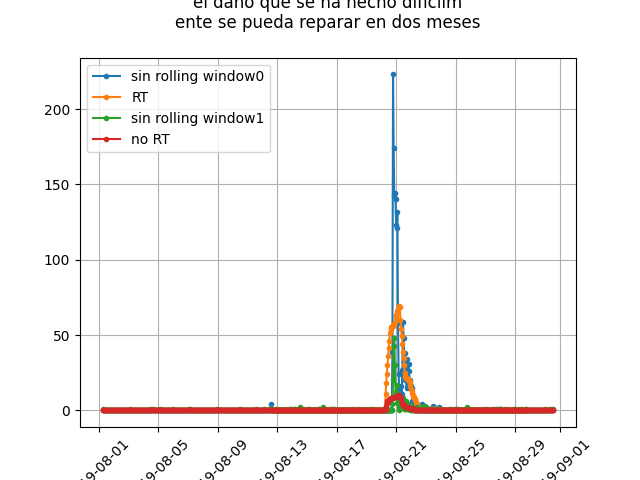

In [5]:
%matplotlib widget
index = 97
df_clus_completo = pd.read_csv(path_git+f'Tw_con_RT/Tw_mas_RT_agosto/Tw_{index}_Cluster_muchas.csv_RT_55.csv')
df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
#df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600

categoria = 'RT'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = [categoria, 'no '+categoria]

plt.figure()
firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]
plt.title(firstpart+'\n'+secondpart)
for i, df1 in enumerate(df_categoria):
    df = df1.copy()
    df_index = df.set_index('Fecha')
    df_count_hora = df_index.resample('1H').count()
    plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'sin rolling window'+str(i), marker = '.') #Test comparation
    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = labels[i], marker = '.', linestyle = 'solid')


plt.legend()
plt.grid(0.7)

plt.xticks(rotation=45)
#plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12)-288))
#plt.xlim([datetime(2019, 8, 3), datetime(2019, 8, 7)])
plt.show()

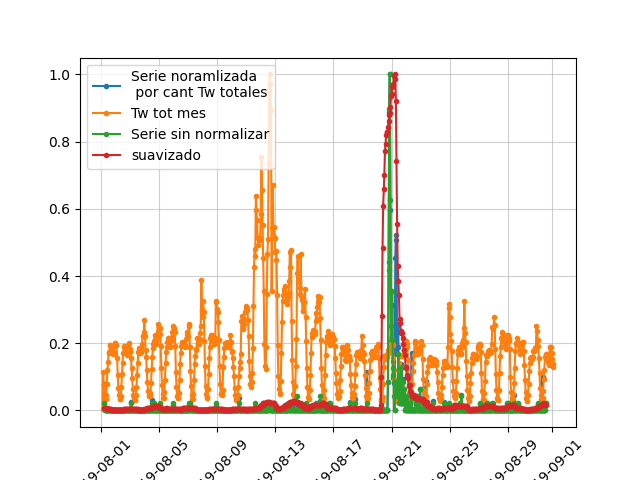

In [6]:
merged = pd.merge(df_count_hora, cant_tot, left_index=True, right_index=True)

rango  = 0.5
merged['resta'] = merged['Tweets']/(merged['Cuentas_Tot']/max(merged['Cuentas_Tot']))
#merged['resta'] = merged['Tweets']/(((merged['Cuentas_Tot']/max(merged['Cuentas_Tot']))*0.5)+0.5)
plt.figure()

plt.plot(merged.index, merged['resta']/max(merged['resta']), marker = '.', linestyle = 'solid', label= 'Serie noramlizada \n por cant Tw totales')
plt.plot(cant_tot.index, cant_tot['Cuentas_Tot']/max(cant_tot['Cuentas_Tot']), marker = '.', linestyle = 'solid', label = 'Tw tot mes')
plt.plot(df_count_hora.index, df_count_hora['Tweets']/max(df_count_hora['Tweets']), marker = '.', linestyle = 'solid', label = 'Serie sin normalizar')
plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), marker = '.', linestyle = 'solid', label = 'suavizado')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(alpha = 0.6)
plt.show()
# cant_tot.index = pd.to_datetime(cant_tot.index, format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')

# aa = pd.DataFrame(df_count_hora['Tweets'])
# cant_tot


In [27]:
max(((merged['Cuentas_Tot']/max(merged['Cuentas_Tot']))*0.5)+0.5)

1.0

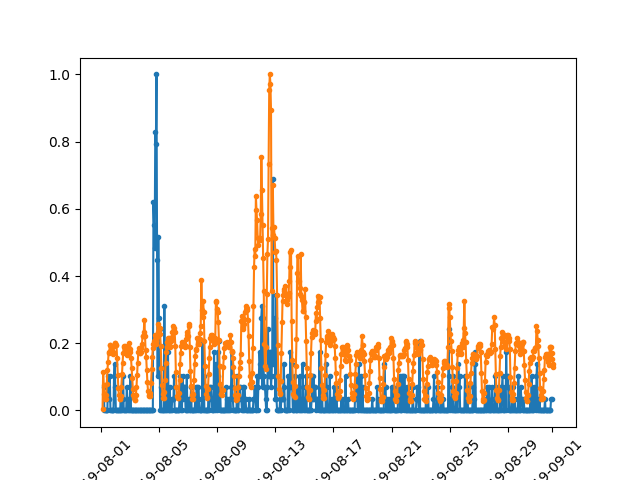

In [9]:
merged = pd.merge(df_count_hora, cant_tot, left_index=True, right_index=True)
merged['resta'] = merged['Tweets']-merged['Cuentas_Tot']

plt.figure()
plt.plot(df_count_hora.index, df_count_hora['Tweets']/max(df_count_hora['Tweets']), marker = '.', linestyle = 'solid')
plt.plot(cant_tot.index, cant_tot['Cuentas_Tot']/max(cant_tot['Cuentas_Tot']), marker = '.', linestyle = 'solid')
plt.xticks(rotation = 45)
plt.show()

Guardamos las imagenes de muchas frases

In [3]:
files = os.listdir(path_git+'Tw_con_RT/Tw_mas_RT_october/')
for f in files:
    patron = r'Tw_(\d+)_Cluster'
    resultado = re.search(patron, f).group(1)
    index = int(resultado)

    df_clus_completo = pd.read_csv(path_git+f'Tw_con_RT/Tw_mas_RT_october/Tw_{index}_Cluster_muchas.csv_RT_55.csv')
    df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')

    categoria = 'RT'

    df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
    df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

    df_categoria = [df_categoria_true, df_categoria_false]
    labels = [categoria, 'no '+categoria]

    plt.figure()
    firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]
    plt.title(firstpart+'\n'+secondpart)
    for i, df1 in enumerate(df_categoria):
        df = df1.copy()
        df_index = df.set_index('Fecha')
        df_count_hora = df_index.resample('1H').count()
        df_suavizado = df_count_hora.rolling('1D', center = True).mean()
        plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = labels[i], marker = '.', linestyle = 'solid')


    plt.legend()
    plt.grid(0.7)

    plt.xticks(rotation=45)
    plt.savefig(path_git+f'imagenes/imagenes_con_RT_0_1500_october/Series_con_RT_{index}.png')
    #plt.show()
    plt.close()

C:\Users\Ale\AppData\Local\Temp\ipykernel_15572\2937691105.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clus_completo = pd.read_csv(path_git+f'Tw_con_RT/Tw_mas_RT_october/Tw_{index}_Cluster_muchas.csv_RT_55.csv')
